# Description

Training a Multi-Layer Perceptron for genre classification from the data extracted using preprocessor.

# Packages

In [ ]:
import json
import numpy as np
from  sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from .utils import load_data, plot_history

# Loading data

In [63]:
DATA_PATH = "preprocessed_raw_audio_data.json"

In [65]:
features, target = load_data(DATA_PATH)

In [66]:
# try
print(f"Feature: {features[0]} \n Label: {target[0]}")

features.shape


Feature: [[-2.42435989e+02  1.02184868e+02 -9.91323471e+00 ... -3.95323277e+00
  -2.40564632e+00 -2.38090801e+00]
 [-2.12989746e+02  1.03544785e+02 -1.08341713e+01 ... -5.81353378e+00
   2.64356709e+00 -2.80662346e+00]
 [-1.95409302e+02  1.04360657e+02 -1.85502887e-01 ... -1.08171625e+01
  -5.88805974e-01 -5.28410244e+00]
 ...
 [-1.24157700e+02  6.37352219e+01  2.11729393e+01 ... -1.65676632e+01
   1.37965145e+01 -2.31835346e+01]
 [-1.11283936e+02  6.05447235e+01  1.33710217e+00 ... -1.22842150e+01
   1.48256063e+01 -1.58052387e+01]
 [-1.31811951e+02  6.65644531e+01 -7.93185902e+00 ... -8.66252232e+00
   1.16732750e+01 -8.72385406e+00]] 
 Label: 0


(9986, 130, 13)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

# Model definiton

In [68]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(features.shape[1], features.shape[2])),
    
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='linear')
])


In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [70]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics =["accuracy"])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 130, 512)       │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 130, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 130, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 130, 256)       │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 130, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 130, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 130, 64)        │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 130, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 130, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,922 (620.79 KB)

 Trainable params: 157,258 (614.29 KB)

 Non-trainable params: 1,664 (6.50 KB)

# Training

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.4618 - loss: 1.9672 - val_accuracy: 0.6128 - val_loss: 1.4838
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6424 - loss: 1.4179 - val_accuracy: 0.6592 - val_loss: 1.2653
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.6834 - loss: 1.2111 - val_accuracy: 0.6779 - val_loss: 1.1626
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.6954 - loss: 1.1088 - val_accuracy: 0.6956 - val_loss: 1.0850
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7195 - loss: 1.0178 - val_accuracy: 0.7513 - val_loss: 0.9384
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.7407 - loss: 0.9616 - val_accuracy: 0.7323 - val_loss: 0.9765
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.7605 - loss: 0.8920 - val_accuracy: 0.7664 - val_loss: 0.8784
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7615 - loss: 0

# Evaluation

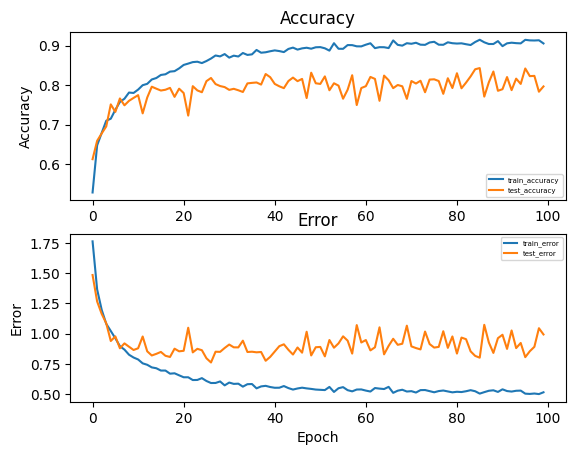

In [73]:
plot_history(history) 

Clearly, even with regularization and dropping, using only MLP for audio data isn't quite a good idea, it's more prone to overfitting.

In [76]:
logits = model.predict(X_test)
probabilities = tf.nn.softmax(logits)
predicted_genres = tf.argmax(probabilities, axis=-1).numpy()

accuracy = np.mean(y_test==predicted_genres)*100

print(f"Accuracy on test set: {accuracy:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy on test set: 79.67%
